LOADING DATASET
Dataset loaded successfully!
Shape: 1338 rows, 7 columns

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

MISSING VALUES CHECK
Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values found!
DUPLICATES VALUES CHECK
Number of duplicate rows: 1
 duplicates values has been deleted 
SEPARATING FEATURES AND TARGET
Features (X) shape: (1337, 6)
Target (y) shape: (1337,)
Feature columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Target column: charges

DATASET SPLITTING (60/20/20)
Split Results:
Training set:   802 samples

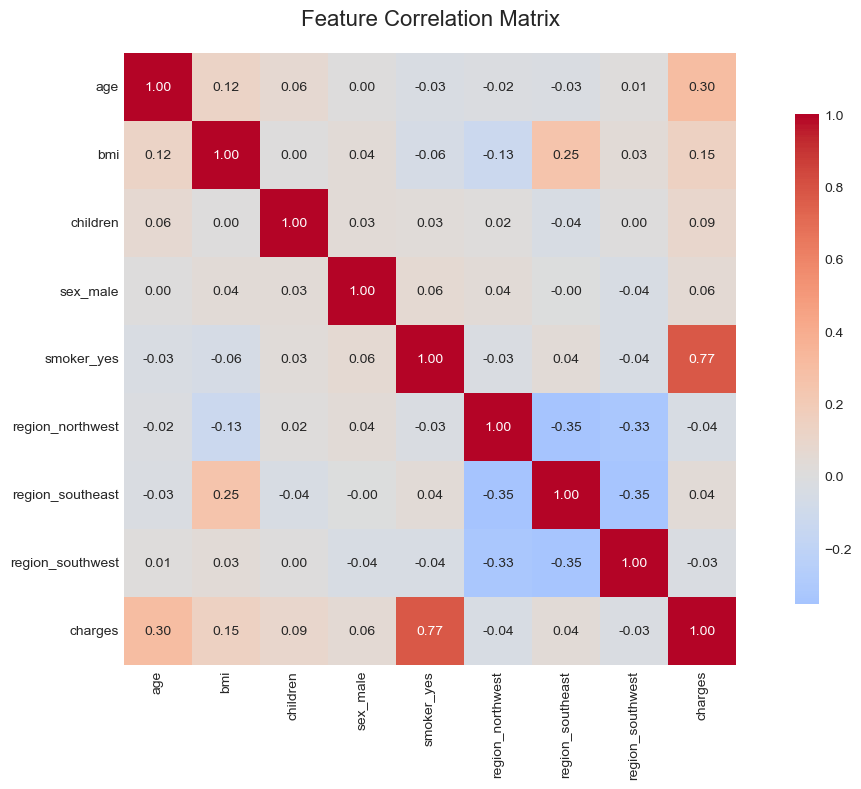

FEATURE IMPORTANCE - RANDOM FOREST
Feature Importance Scores:
            Feature  Importance
4        smoker_yes      0.5958
1               bmi      0.2166
0               age      0.1462
2          children      0.0181
6  region_southeast      0.0068
5  region_northwest      0.0062
3          sex_male      0.0062
7  region_southwest      0.0043



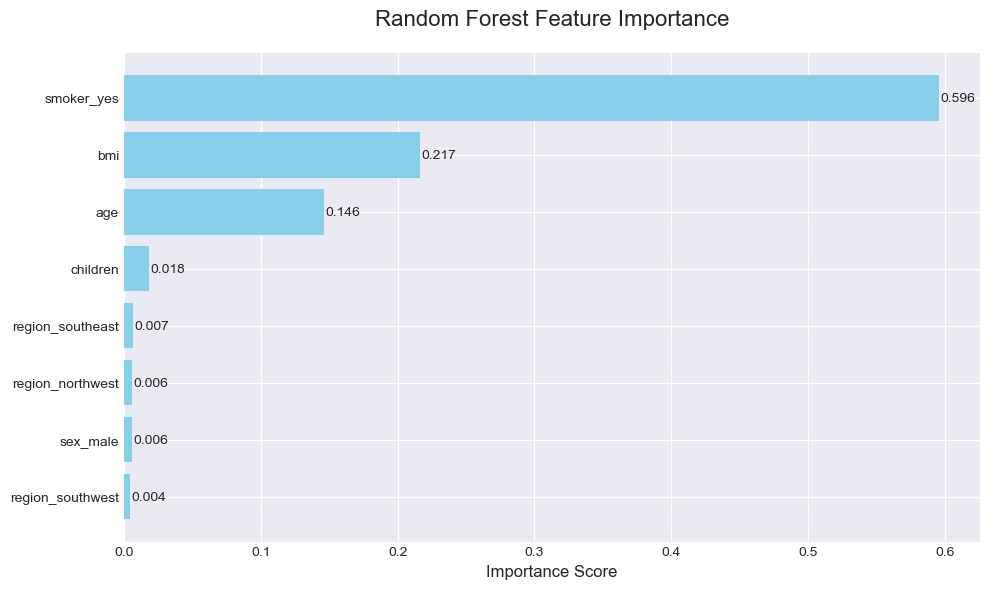

PERMUTATION IMPORTANCE
Permutation Importance (Mean ± Std):
            Feature  Importance     Std
4        smoker_yes      1.5840  0.0413
1               bmi      0.3914  0.0239
0               age      0.3218  0.0108
2          children      0.0523  0.0038
5  region_northwest      0.0121  0.0011
6  region_southeast      0.0120  0.0013
3          sex_male      0.0119  0.0022
7  region_southwest      0.0089  0.0012



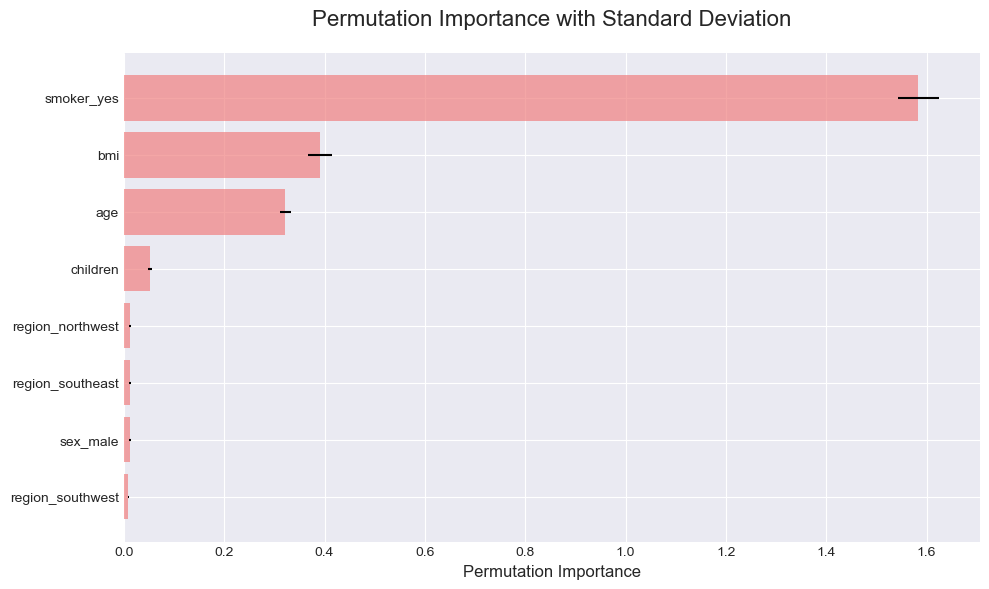

FEATURE SELECTION DECISION
Features with importance < 0.01:
  - region_southeast: 0.0068
  - region_northwest: 0.0062
  - sex_male: 0.0062
  - region_southwest: 0.0043

Recommendation: Consider dropping these features for model simplicity
FEATURE RELATIONSHIPS VISUALIZATION


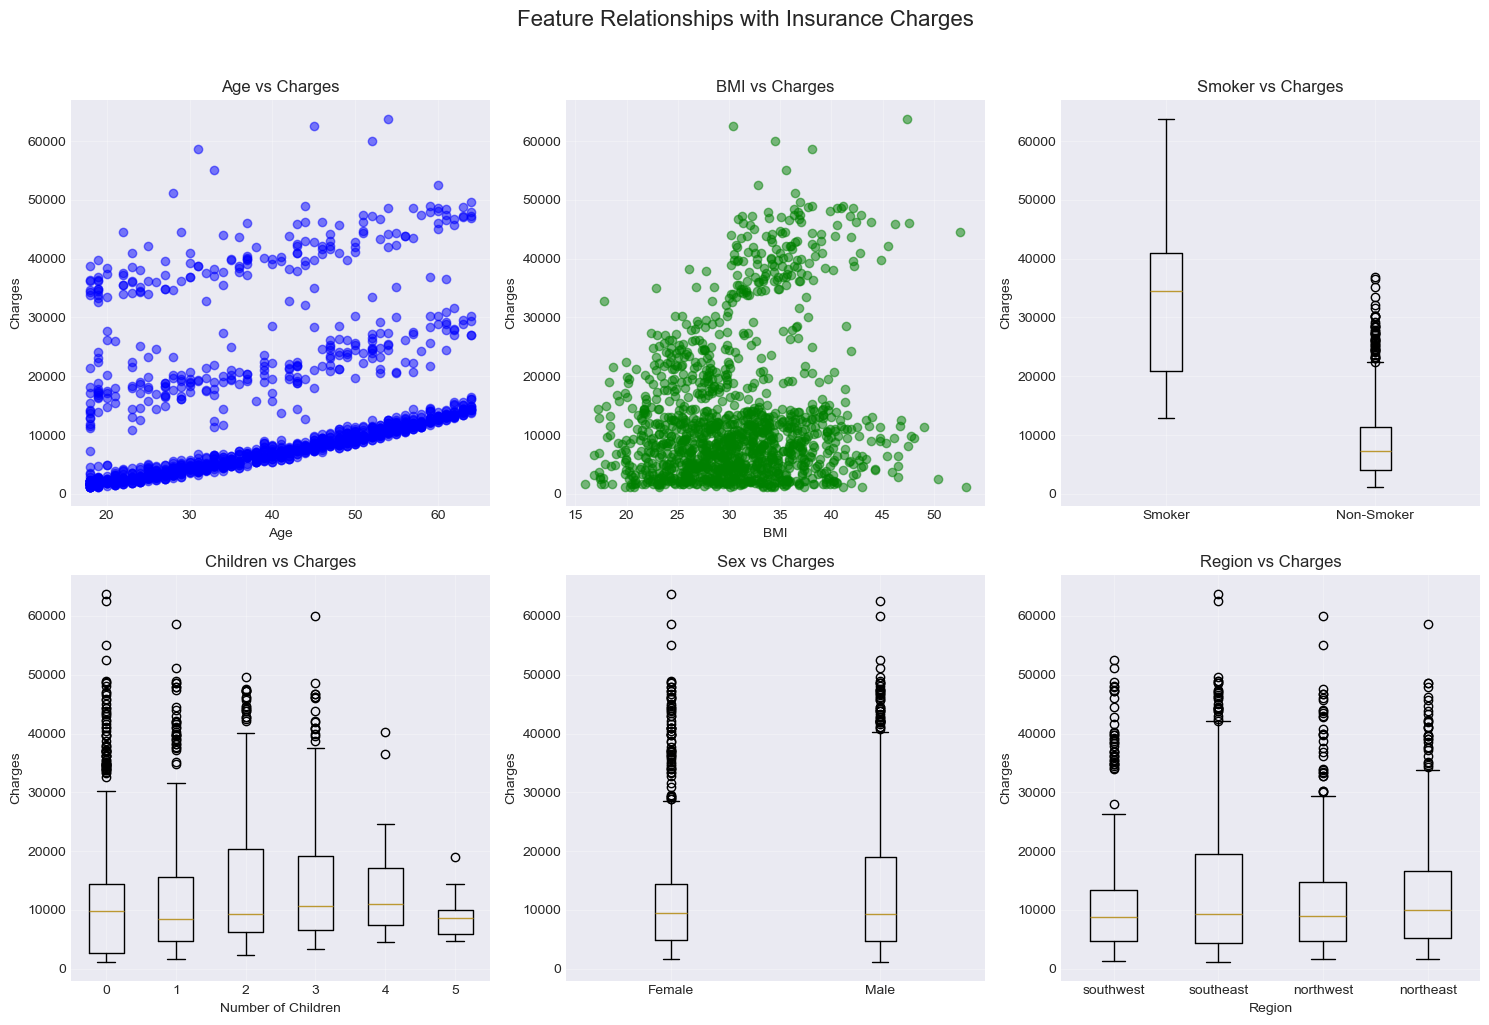

✅ Feature importance analysis completed!


In [26]:
# ============================================
# DATA PREPROCESSING - INSURANCE COST PREDICTION
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
print("=" * 50)
print("LOADING DATASET")
print("=" * 50)
df = pd.read_csv('C:\\Users\\MICROSOFT PRO DZ\\Desktop\\Fils\\cours&TD&TP\\FIA\\proge\\insurance.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())
print()

# Step 3: Check Missing Values
print("=" * 50)
print("MISSING VALUES CHECK")
print("=" * 50)
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print()

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values beffor deletion : {missing_values.sum()}")
    num_imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# للأعمدة النصية → الأكثر تكرارًا
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    print(f" missing values has been deleted ")

# Step 3':check the duplicates 
print("=" * 50)
print("DUPLICATES VALUES CHECK")
print("=" * 50)
duplicates = df.duplicated() 
if duplicates.sum() == 0:
    print("No duplicates values found!")
else:
    print(f"Number of duplicate rows: {duplicates.sum()}") 
    df.drop_duplicates(inplace=True)
    print(f" duplicates values has been deleted ")


# Step 4: Separate Features (X) and Target (y)
print("=" * 50)
print("SEPARATING FEATURES AND TARGET")
print("=" * 50)
X = df.drop(columns=['charges'])  # Features
y = df['charges']                 # Target variable
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")
print(f"Target column: charges")
print()

# Step 5: Train/Validation/Test Split (60/20/20)
print("=" * 50)
print("DATASET SPLITTING (60/20/20)")
print("=" * 50)
# First split: 60% train, 40% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: 50% of temp = validation, 50% = test (20% each of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Split Results:")
print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print()

# Step 6: Identify Column Types
print("=" * 50)
print("IDENTIFYING COLUMN TYPES")
print("=" * 50)
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print()

# Step 7: Create Preprocessing Pipeline
print("=" * 50)
print("CREATING PREPROCESSING PIPELINE")
print("=" * 50)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),      # Scale numerical features
    ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical
])

print("Preprocessor created with:")
print("1. StandardScaler for numerical columns")
print("2. OneHotEncoder for categorical columns (drop='first')")
print()

# Step 8: Fit and Transform Data
print("=" * 50)
print("FITTING AND TRANSFORMING DATA")
print("=" * 50)
# Fit on training data
print("Fitting preprocessor on training data...")
X_train_processed = preprocessor.fit_transform(X_train)
print("Training data transformed")

# Transform validation and test data
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)
print("Validation and test data transformed")
print()

print("Original vs Processed Shapes:")
print(f"X_train: {X_train.shape} → X_train_processed: {X_train_processed.shape}")
print(f"X_val:   {X_val.shape} → X_val_processed:   {X_val_processed.shape}")
print(f"X_test:  {X_test.shape} → X_test_processed:  {X_test_processed.shape}")
print()

# Step 9: Check Feature Names
print("=" * 50)
print("PROCESSED FEATURE NAMES")
print("=" * 50)
# Get feature names after transformation
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(cat_feature_names)

print(f"Total features after preprocessing: {len(all_feature_names)}")
print("\nFeature list:")
for i, name in enumerate(all_feature_names):
    print(f"{i+1:2}. {name}")
print()

# Step 10: K-Fold Cross-Validation Setup
print("=" * 50)
print("K-FOLD CROSS-VALIDATION SETUP")
print("=" * 50)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"5-Fold Cross-Validation configured")
print("Each fold: 80% training, 20% validation")
print()

# Step 11: Verify Data Types
print("=" * 50)
print("DATA TYPE VERIFICATION")
print("=" * 50)
print("Training set type:", type(X_train_processed))
print("Validation set type:", type(X_val_processed))
print("Test set type:", type(X_test_processed))

# Convert to arrays if needed (for PyTorch compatibility)
X_train_array = X_train_processed if isinstance(X_train_processed, np.ndarray) else X_train_processed.toarray()
X_val_array = X_val_processed if isinstance(X_val_processed, np.ndarray) else X_val_processed.toarray()
X_test_array = X_test_processed if isinstance(X_test_processed, np.ndarray) else X_test_processed.toarray()

print("\nPreprocessing completed successfully!")
print("=" * 50)

# Optional: Save processed data for later use
print("\nOptional: Save processed data?")
save_choice = 'y'
if save_choice == 'y':
    import joblib
    # Save preprocessor
    joblib.dump(preprocessor, 'preprocessor.pkl')
    print("Preprocessor saved as 'preprocessor.pkl'")
    
    # Save processed data
    np.savez('processed_data.npz',
             X_train=X_train_array,
             X_val=X_val_array,
             X_test=X_test_array,
             y_train=y_train.values,
             y_val=y_val.values,
             y_test=y_test.values,
             feature_names=all_feature_names)
    print("Processed data saved as 'processed_data.npz'")
else:
    print("Data not saved. Using in-memory arrays.")


#######################################################


# ============================================
# FEATURE IMPORTANCE & ANALYSIS
# ============================================

# Step 1: Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Step 2: Load or Use Processed Data
# If you saved from previous step:
try:
    # Load saved processed data
    data = np.load('processed_data.npz', allow_pickle=True)
    X_train = data['X_train']
    y_train = data['y_train']
    feature_names = data['feature_names']
    print("✅ Loaded saved processed data")
except:
    # Use in-memory data from previous preprocessing
    print("⚠️ Using in-memory data (run preprocessing first)")
    # Make sure these variables exist from previous step
    # X_train_array, y_train, all_feature_names
    
# Step 3: Create DataFrame for Analysis
print("=" * 50)
print("CREATING ANALYSIS DATAFRAME")
print("=" * 50)

# Create DataFrame with processed features
df_processed = pd.DataFrame(X_train, columns=feature_names)
df_processed['charges'] = y_train

print(f"Processed DataFrame shape: {df_processed.shape}")
print("\nFirst 3 rows of processed data:")
print(df_processed.head(3))
print()

# Step 4: Correlation Analysis
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
correlation_matrix = df_processed.corr()

print("Correlation with target (charges):")
correlation_with_target = correlation_matrix['charges'].sort_values(ascending=False)
print(correlation_with_target.round(3))
print()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Feature Importance with Random Forest
print("=" * 50)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("=" * 50)

# Train Random Forest for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df.round(4))
print()

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], 
                feature_importance_df['Importance'],
                color='skyblue')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=16, pad=20)
plt.gca().invert_yaxis()  # Most important on top

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 6: Permutation Importance
print("=" * 50)
print("PERMUTATION IMPORTANCE")
print("=" * 50)

# Calculate permutation importance
perm_importance = permutation_importance(rf_model, X_train, y_train,
                                        n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print("Permutation Importance (Mean ± Std):")
print(perm_importance_df.round(4))
print()

# Visualize permutation importance
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(perm_importance_df))
plt.barh(y_pos, perm_importance_df['Importance'], 
         xerr=perm_importance_df['Std'],
         color='lightcoral', alpha=0.7)
plt.yticks(y_pos, perm_importance_df['Feature'])
plt.xlabel('Permutation Importance', fontsize=12)
plt.title('Permutation Importance with Standard Deviation', fontsize=16, pad=20)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('permutation_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 7: Feature Selection Decision
print("=" * 50)
print("FEATURE SELECTION DECISION")
print("=" * 50)

# Identify features with low importance (threshold = 0.01)
threshold = 0.01
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()

if low_importance_features:
    print(f"Features with importance < {threshold}:")
    for feat in low_importance_features:
        importance = feature_importance_df[feature_importance_df['Feature'] == feat]['Importance'].values[0]
        print(f"  - {feat}: {importance:.4f}")
    
    print("\nRecommendation: Consider dropping these features for model simplicity")
else:
    print(f"No features with importance < {threshold}")
    print("Recommendation: Keep all features")

# Step 8: Feature Relationships Visualization
print("=" * 50)
print("FEATURE RELATIONSHIPS VISUALIZATION")
print("=" * 50)

# Create subplots for key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Relationships with Insurance Charges', fontsize=16, y=1.02)

# Plot 1: Age vs Charges
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.5, color='blue')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')
axes[0, 0].set_title('Age vs Charges')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: BMI vs Charges
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.5, color='green')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')
axes[0, 1].set_title('BMI vs Charges')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Smoker vs Charges (boxplot)
smoker_charges = [df[df['smoker'] == 'yes']['charges'], 
                  df[df['smoker'] == 'no']['charges']]
axes[0, 2].boxplot(smoker_charges, labels=['Smoker', 'Non-Smoker'])
axes[0, 2].set_ylabel('Charges')
axes[0, 2].set_title('Smoker vs Charges')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Children vs Charges
axes[1, 0].boxplot([df[df['children'] == i]['charges'] for i in range(6)], 
                   labels=[str(i) for i in range(6)])
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Charges')
axes[1, 0].set_title('Children vs Charges')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Sex vs Charges
sex_charges = [df[df['sex'] == 'female']['charges'], 
               df[df['sex'] == 'male']['charges']]
axes[1, 1].boxplot(sex_charges, labels=['Female', 'Male'])
axes[1, 1].set_ylabel('Charges')
axes[1, 1].set_title('Sex vs Charges')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Region vs Charges
region_charges = [df[df['region'] == region]['charges'] for region in df['region'].unique()]
axes[1, 2].boxplot(region_charges, labels=df['region'].unique())
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Charges')
axes[1, 2].set_title('Region vs Charges')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Feature importance analysis completed!")
print("=" * 50)